In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the datasets
try:
    covid_df = pd.read_csv('/covid19_Confirmed_dataset.csv')
    happiness_df = pd.read_csv('/worldwide_happiness_report.csv') # Assuming you use the 2021 report
    print("Datasets loaded successfully!")
except FileNotFoundError:
    print("Error: Make sure your CSV files are in the same directory as this notebook.")
# Display the first few rows to confirm loading
print("\n--- COVID-19 Confirmed Cases Data ---")
print(covid_df.head())
print("\n--- Worldwide Happiness Report Data ---")
print(happiness_df.head())

Datasets loaded successfully!

--- COVID-19 Confirmed Cases Data ---
  Province/State Country/Region      Lat     Long  1/22/20  1/23/20  1/24/20  \
0            NaN    Afghanistan  33.0000  65.0000        0        0        0   
1            NaN        Albania  41.1533  20.1683        0        0        0   
2            NaN        Algeria  28.0339   1.6596        0        0        0   
3            NaN        Andorra  42.5063   1.5218        0        0        0   
4            NaN         Angola -11.2027  17.8739        0        0        0   

   1/25/20  1/26/20  1/27/20  ...  4/21/20  4/22/20  4/23/20  4/24/20  \
0        0        0        0  ...     1092     1176     1279     1351   
1        0        0        0  ...      609      634      663      678   
2        0        0        0  ...     2811     2910     3007     3127   
3        0        0        0  ...      717      723      723      731   
4        0        0        0  ...       24       25       25       25   

   4/25/20 

In [19]:
# --- Preprocessing the COVID-19 Data without Melting ---
# Aggregate cases by 'Country/Region' and sum the confirmed cases over all dates
# This also handles cases with different provinces within the same country
covid_aggregated = covid_df.groupby('Country/Region').sum().reset_index()

# Drop the 'Lat' and 'Long' columns as they are not needed for this analysis
covid_aggregated = covid_aggregated.drop(columns=['Lat', 'Long'])

# Get the name of the last column, which represents the most recent date
last_date_column = covid_aggregated.columns[-1]

# Create a new DataFrame with just the country and the latest confirmed cases
latest_covid_data = covid_aggregated[['Country/Region', last_date_column]].rename(columns={last_date_column: 'Confirmed_Cases', 'Country/Region': 'Country'})

# --- Preprocessing the Worldwide Happiness Data ---
# Rename columns for easier access and to prepare for merging
happiness_df.rename(columns={'Country or region': 'Country',
                                'Score': 'Happiness_Score',
                                'GDP per capita': 'GDP_per_capita',
                                'Social support': 'Social_Support',
                                'Healthy life expectancy': 'Healthy_Life_Expectancy',
                                'Freedom to make life choices': 'Freedom',
                                'Perceptions of corruption': 'Corruption'},
                    inplace=True)

print("Data cleaning and preprocessing are complete.")

Data cleaning and preprocessing are complete.


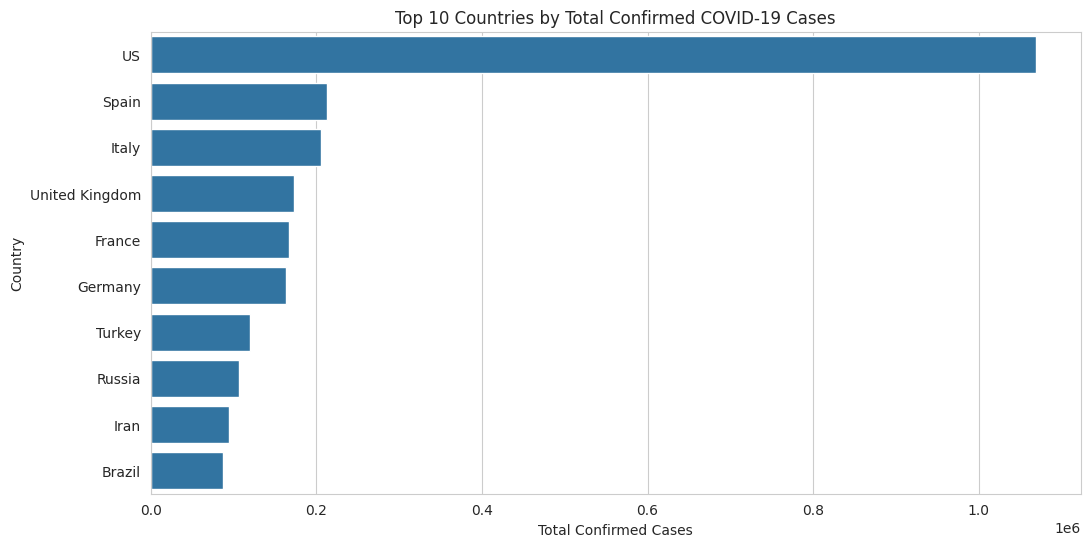

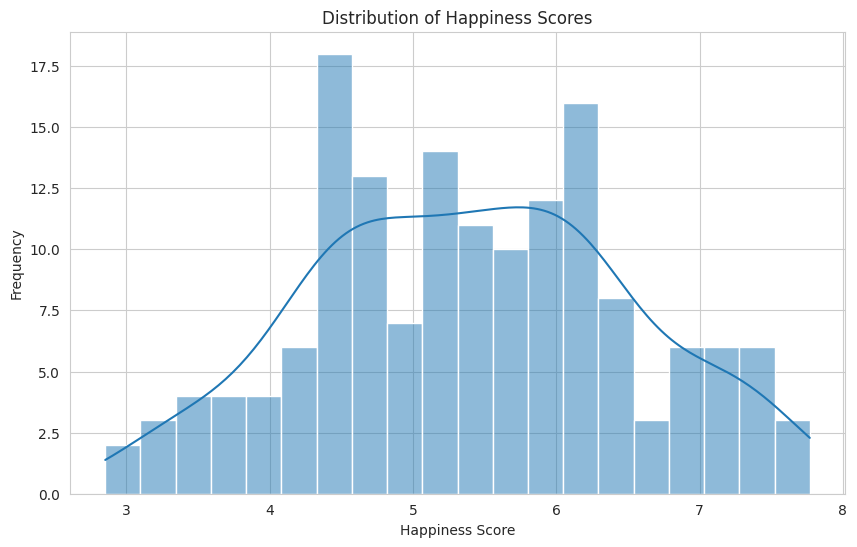

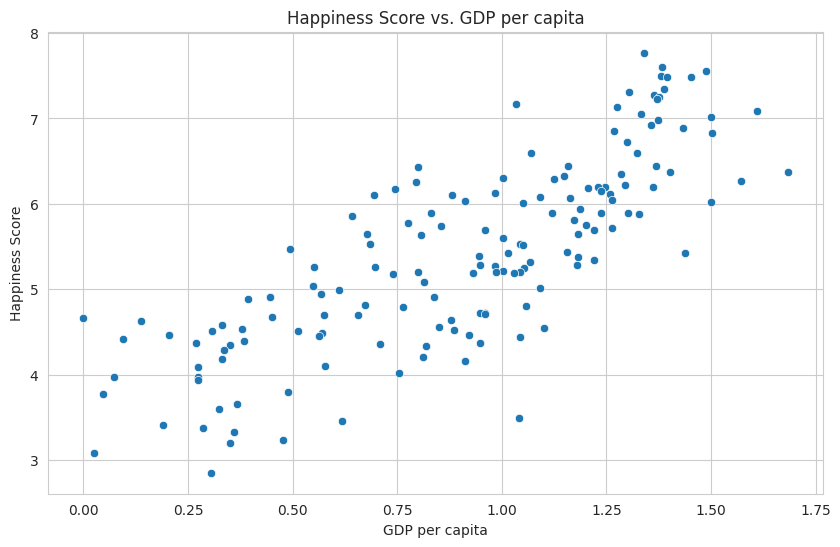

In [20]:
sns.set_style('whitegrid')

# Plot the top 10 countries by total confirmed COVID-19 cases
top_10_countries_covid = latest_covid_data.sort_values(by='Confirmed_Cases', ascending=False).head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x='Confirmed_Cases', y='Country', data=top_10_countries_covid)
plt.title('Top 10 Countries by Total Confirmed COVID-19 Cases')
plt.xlabel('Total Confirmed Cases')
plt.ylabel('Country')
plt.show()

# Plot the distribution of happiness scores to see if the data is skewed
plt.figure(figsize=(10, 6))
sns.histplot(happiness_df['Happiness_Score'], kde=True, bins=20)
plt.title('Distribution of Happiness Scores')
plt.xlabel('Happiness Score')
plt.ylabel('Frequency')
plt.show()

# Visualize the relationship between happiness and GDP per capita
plt.figure(figsize=(10, 6))
sns.scatterplot(x='GDP_per_capita', y='Happiness_Score', data=happiness_df)
plt.title('Happiness Score vs. GDP per capita')
plt.xlabel('GDP per capita')
plt.ylabel('Happiness Score')
plt.show()

Datasets merged successfully.


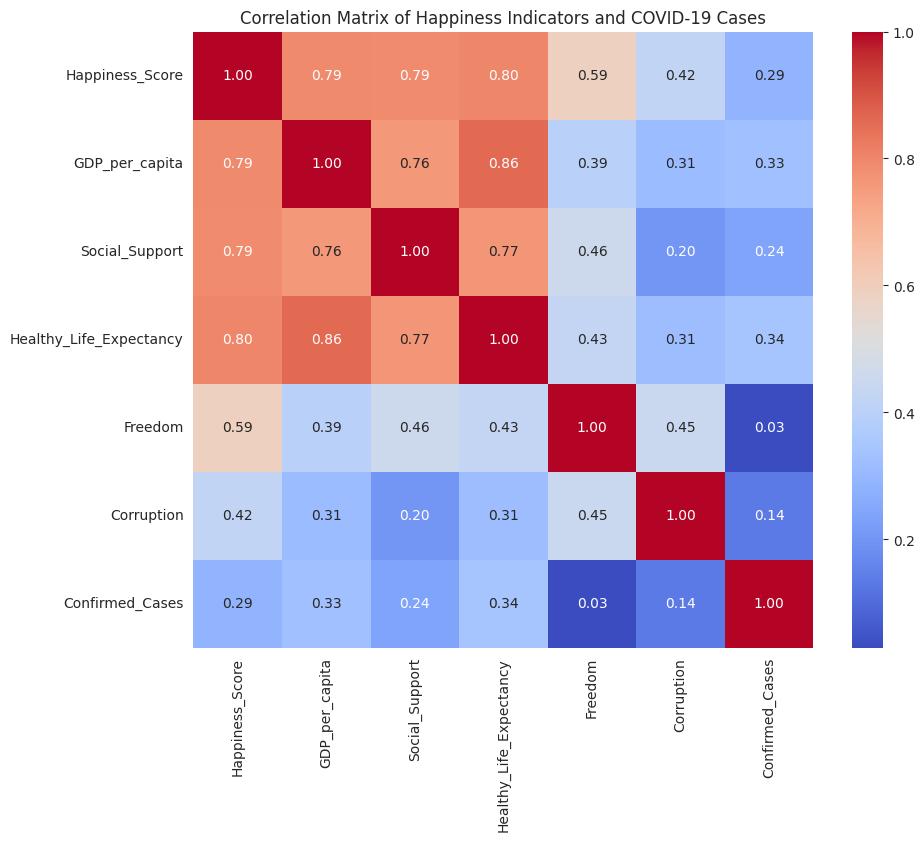

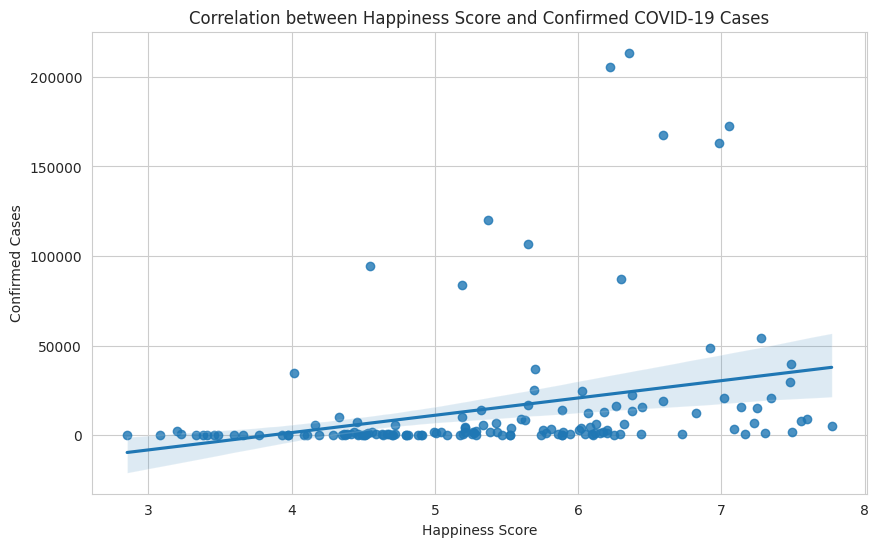

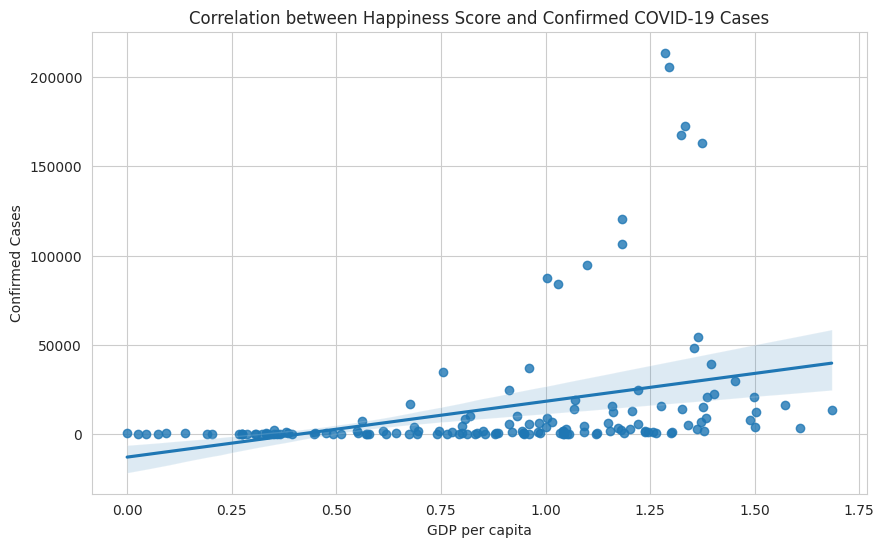

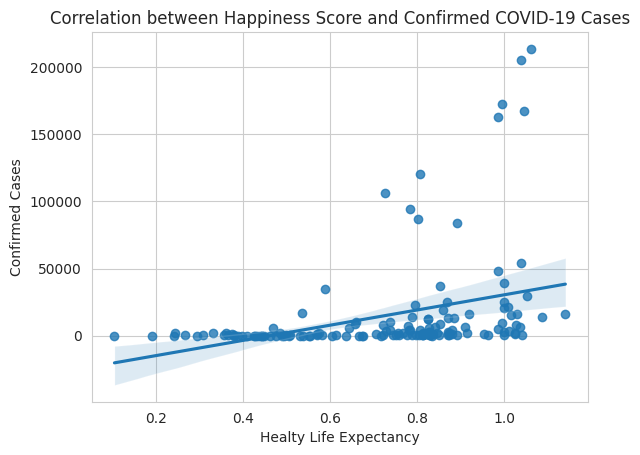

In [25]:
# Merge the two datasets on the 'Country' column using an inner join
merged_df = pd.merge(happiness_df, latest_covid_data, on='Country', how='inner')
print("Datasets merged successfully.")

# Calculate the correlation matrix for key variables
correlation_matrix = merged_df[['Happiness_Score',
                                'GDP_per_capita',
                                'Social_Support',
                                'Healthy_Life_Expectancy',
                                'Freedom',
                                'Corruption',
                                'Confirmed_Cases']].corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Happiness Indicators and COVID-19 Cases')
plt.show()

# Scatter plot to visualize the correlation between Happiness Score and Confirmed Cases
plt.figure(figsize=(10, 6))
sns.regplot(x='Happiness_Score', y='Confirmed_Cases', data=merged_df)
plt.title('Correlation between Happiness Score and Confirmed COVID-19 Cases')
plt.xlabel('Happiness Score')
plt.ylabel('Confirmed Cases')
plt.show()
plt.figure(figsize=(10, 6))
sns.regplot(x='GDP_per_capita', y='Confirmed_Cases', data=merged_df)
plt.title('Correlation between Happiness Score and Confirmed COVID-19 Cases')
plt.xlabel('GDP per capita')
plt.ylabel('Confirmed Cases')
plt.show()
sns.regplot(x='Healthy_Life_Expectancy', y='Confirmed_Cases', data=merged_df)
plt.title('Correlation between Happiness Score and Confirmed COVID-19 Cases')
plt.xlabel('Healty Life Expectancy')
plt.ylabel('Confirmed Cases')
plt.show()

In [27]:
# Summarize your findings based on the analysis
print("\n--- Project Insights and Conclusions ---")

# Analyze the correlation between Happiness Score and Confirmed Cases
correlation_score = correlation_matrix.loc['Happiness_Score', 'Confirmed_Cases']
print(f"The correlation between Happiness Score and Confirmed Cases is: {correlation_score:.2f}")
correlation_score1 = correlation_matrix.loc['GDP_per_capita', 'Confirmed_Cases']
print(f"The correlation between GDP per capita and Confirmed Cases is: {correlation_score1:.2f}")
correlation_score2 = correlation_matrix.loc['Healthy_Life_Expectancy', 'Confirmed_Cases']
print(f"The correlation between Life expectancy and Confirmed Cases is: {correlation_score2:.2f}")

# You can add more detailed insights here based on your observations
print("\nKey Observations:")
print("   - From the scatter plots, there appears to be a weak or no direct linear relationship between a country's happiness score, Gdp , life expectancy and its total confirmed COVID-19 cases.")
print("   - we can further analyze that they are +ve ly co related to each other but the relationship is very weak[comparatively in the order of life expectancy>GDP>happiness score].")
print("   - This project demonstrates that the relationship between these global indicators is complex and likely influenced by many other factors not included in these datasets, such as government policies, testing rates, and population density.")


--- Project Insights and Conclusions ---
The correlation between Happiness Score and Confirmed Cases is: 0.29
The correlation between GDP per capita and Confirmed Cases is: 0.33
The correlation between Life expectancy and Confirmed Cases is: 0.34

Key Observations:
   - From the scatter plots, there appears to be a weak or no direct linear relationship between a country's happiness score, Gdp , life expectancy and its total confirmed COVID-19 cases.
   - we can further analyze that they are +ve ly co related to each other but the relationship is very weak[comparatively in the order of life expectancy>GDP>happiness score].
   - This project demonstrates that the relationship between these global indicators is complex and likely influenced by many other factors not included in these datasets, such as government policies, testing rates, and population density.
